# The Sparks Foundation

# Task-3 - Exploratory Data Analysis - Retail

By, kavin V

#### Problem Statement:

    Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. Try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?
    
#### DataSet : 
    
    https://bit.ly/3i4rbWl
    
#### Exploratory Data Analysis[EDA]:
 
     Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# Necessary Imports

In [1]:
#Neessary imports

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#importing dataset

dataset = pd.read_csv("DataSets/SampleSuperstore.csv")
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Getting basic info of training dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
#Check for any null values

dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#Check for any duplicate values

dataset.duplicated().sum()

17

In [6]:
#removing duplicate rows in dataset

dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

# Exploratory Data Analysis [EDA] 

## 1.Univariate Analysis

### Ship Mode :

In [7]:
#Extracting ShipMode feature

ShipMode = dataset.iloc[:,0]
ShipMode.value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

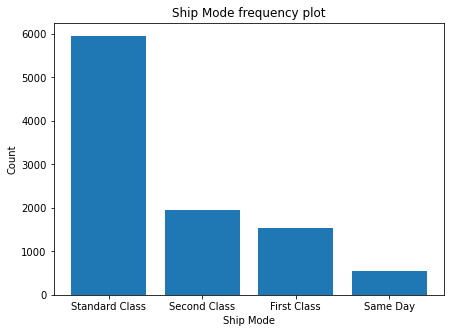

In [8]:
#Exploring ShipMode feature

ShipMode = dataset.iloc[:,0]
plt.figure(figsize=(7,5))
plt.bar(ShipMode.value_counts().keys(),ShipMode.value_counts())
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.title("Ship Mode frequency plot")
plt.show()

### Segment :

In [9]:
#Extracting Segment Column

Segment = dataset.iloc[:,1]
Segment.value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

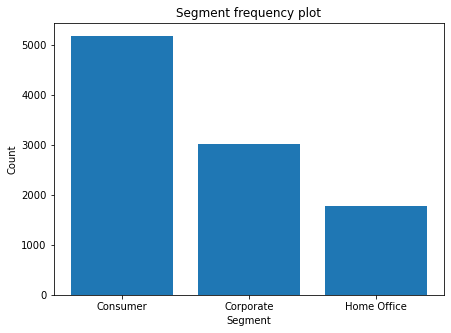

In [10]:
#Exploring Segment Column

Segment = dataset.iloc[:,1]
plt.figure(figsize=(7,5))
plt.bar(Segment.value_counts().keys(),Segment.value_counts())
plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Segment frequency plot")
plt.show()

### Country :

In [11]:
#Extrating Country Column

Country = dataset.iloc[:,2]
Country.value_counts()

United States    9977
Name: Country, dtype: int64

Since, the country column is unique we don't need it anymore

In [12]:
#dataset

dataset = dataset.drop(["Country","Postal Code"],axis="columns")
dataset.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### State :

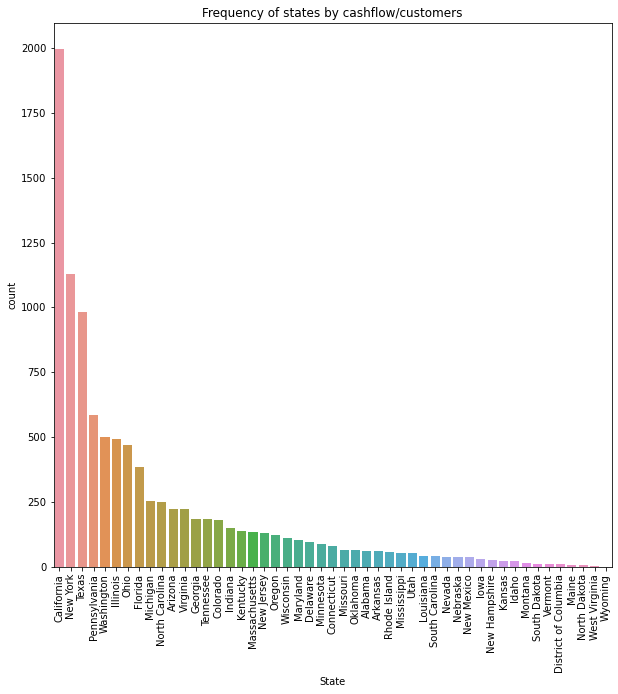

In [13]:
#Frequency of states by cashflow/customers

plt.figure(figsize=(10,10))
sns.countplot(x="State",data=dataset,order=dataset["State"].value_counts().index)
plt.title("Frequency of states by cashflow/customers")
plt.xticks(rotation=90)
plt.show()

Observation

* We can see that, [Maine, North Dakota, West virginia and Wyoming] has low cashflow/customers. We should improve sales in these states. Thereby, gradual rise in the profit percentage.

Text(0.5, 1.0, 'Region')

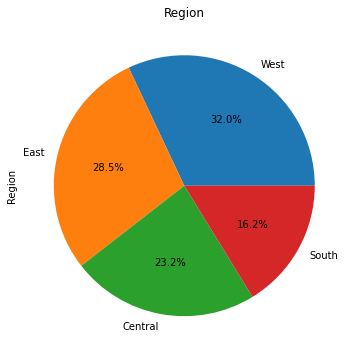

In [14]:
#Exploring Region Column 

plt.figure(figsize=(6,6))
dataset["Region"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Region")

Observation:

* Southern and central regions have low cashflow/customers than East and west regions.

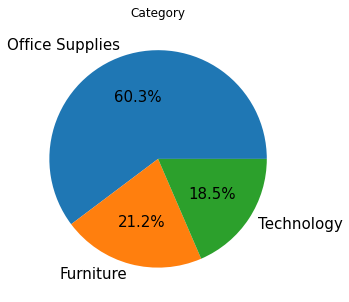

In [15]:
#Exploring Category Column

plt.figure(figsize=(5,5))
plt.pie(dataset['Category'].value_counts(), labels = dataset['Category'].value_counts().index,autopct='%.1f%%',textprops={"fontsize":15})
plt.title("Category")
plt.show()

Observation:
* Steps need to be taken to improve sales on Technology and Furniture sector

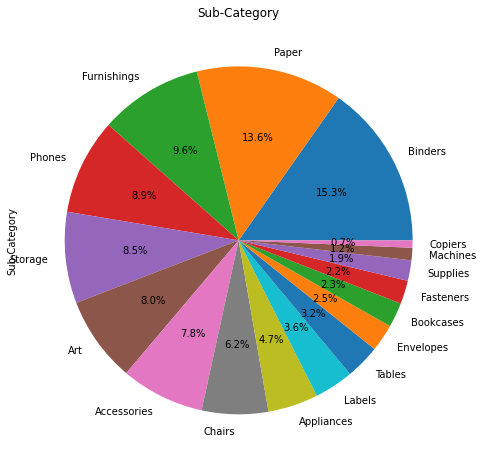

In [16]:
#Exploring Sub-Category Column

plt.figure(figsize=(10,8))
dataset['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sub-Category")
plt.show()

Obseravation:
* Sales on "Copier Machines, Supplies, Fasteners, Bookcases and Envelopes" needs to be enhanced

### Bi-Variate Analysis
### City :

In [17]:
#Extracting City Column

dataset["City"].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
San Luis Obispo      1
Holyoke              1
Conway               1
La Quinta            1
Palatine             1
Name: City, Length: 531, dtype: int64

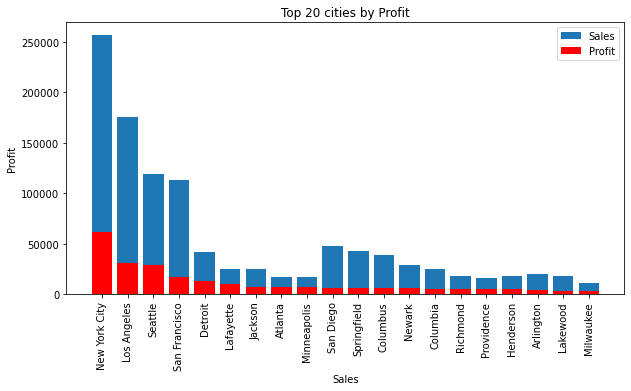

In [18]:
#Plotting top 20 cities by Profit

top_20_cities = dataset.groupby("City")[["Profit","Sales"]].sum().nlargest(n=20,columns="Profit")
plt.figure(figsize=(10,5))
plt.bar(top_20_cities.index,top_20_cities["Sales"],label="Sales")
plt.bar(top_20_cities.index,top_20_cities["Profit"],color="red",label="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Top 20 cities by Profit")
plt.xticks(rotation=90)
plt.legend()
plt.show()

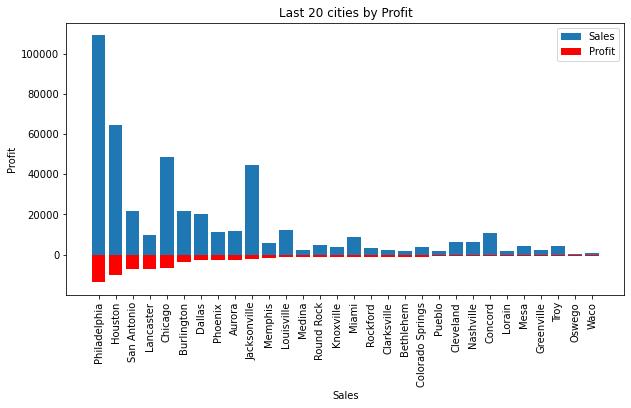

In [19]:
#Exploring Last 20 cities by Profit

last_20_cities = dataset.groupby("City")[["Profit","Sales"]].sum().nsmallest(n=30,columns="Profit")
plt.figure(figsize=(10,5))
plt.bar(last_20_cities.index,last_20_cities["Sales"],label="Sales")
plt.bar(last_20_cities.index,last_20_cities["Profit"],color="red",label="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Last 20 cities by Profit")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Observation:
* The above plot depicts the cities where sales & Profit needs to be improved especially in Philadelphia, Houston, San Antonio, Lancaster, Chicago, Burlington, Dallas, phoenix and Aurora.

### State :

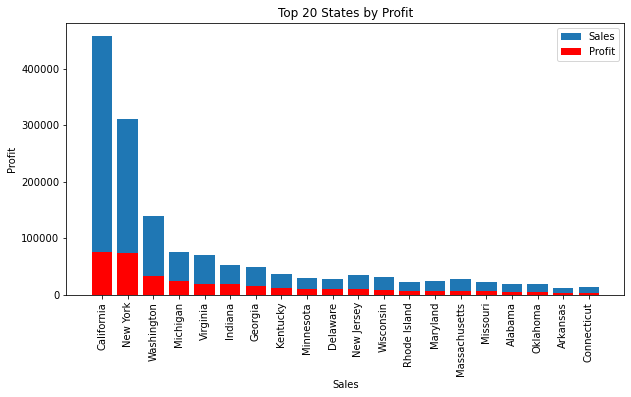

In [20]:
#Exploring top 20 States by Profit

top_20_states = dataset.groupby("State")[["Profit","Sales"]].sum().nlargest(n=20,columns="Profit")
plt.figure(figsize=(10,5))
plt.bar(top_20_states.index,top_20_states["Sales"],label="Sales")
plt.bar(top_20_states.index,top_20_states["Profit"],color="red",label="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Top 20 States by Profit")
plt.xticks(rotation=90)
plt.legend()
plt.show()

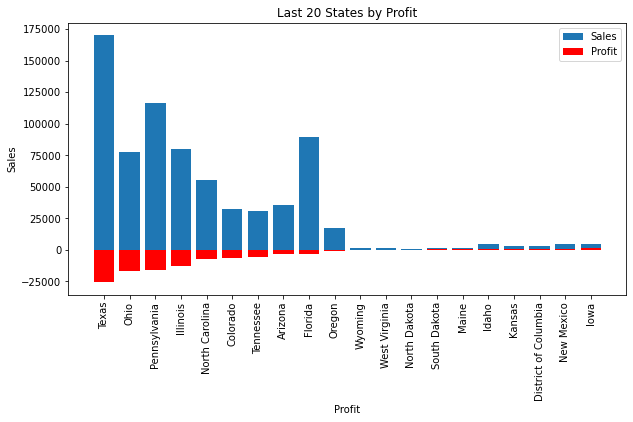

In [21]:
#Exploring Last 20 States by Profit

last_20_states = dataset.groupby("State")[["Profit","Sales"]].sum().nsmallest(n=20,columns="Profit")
plt.figure(figsize=(10,5))
plt.bar(last_20_states.index,last_20_states["Sales"],label="Sales")
plt.bar(last_20_states.index,last_20_states["Profit"],color="red",label="Profit")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Last 20 States by Profit")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Observation:
* The above plot depicts last 20 States where Profit needs to improved especially Texas, Ohio, Pennsylvania, IIIinois, North carolina, Corlorado, Tennessee, Arizona and Florida.

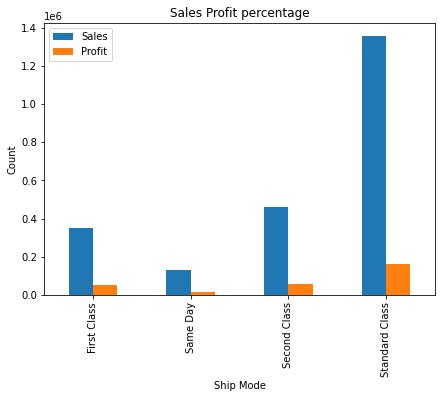

In [22]:
#Plotting Sales Profit percentage on Ship Mode basis 

dataset.groupby('Ship Mode')[['Sales','Profit']].sum().plot.bar(figsize=(7,5))
plt.ylabel("Count")
plt.title("Sales Profit percentage")
plt.show()

In [23]:
#Investigating Category feature

dataset.groupby("Category").Sales.sum().nlargest(84)

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

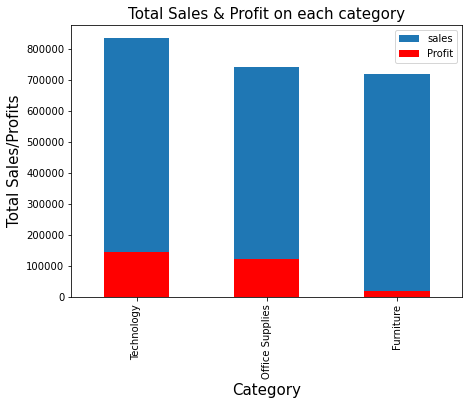

In [24]:
#Plotting total Sales value on each category 
sales_by_category = dataset.groupby("Category").Sales.sum().nlargest(n=3)

#Plotting total Sales value on each category 
Profit_by_category = dataset.groupby("Category").Profit.sum().nlargest(n=3)

# plotting to see it visually
sales_by_category.plot(kind = 'bar',figsize = (7,5),fontsize = 10,label="sales")
Profit_by_category.plot(kind = 'bar',figsize = (7,5),fontsize = 10,color='red',label="Profit")

plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Total Sales & Profit on each category",fontsize = 15)
plt.legend()
plt.show()


Observation:
* We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.

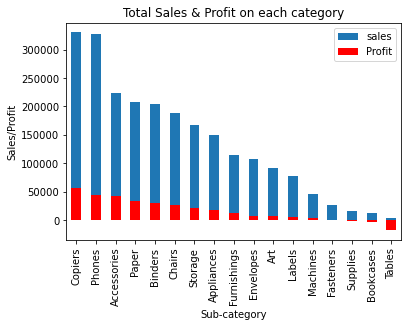

In [25]:
#Plotting total Sales value on each sub-category 
sales = dataset.groupby("Sub-Category").Sales.sum().nlargest(n=20)

#Plotting total Sales value on each sub-category
profit = dataset.groupby("Sub-Category").Profit.sum().nlargest(n=20)

plt.figure()
sales.plot(kind="bar",label="sales")
profit.plot(kind="bar",color="red",label="Profit")
plt.xlabel("Sub-category")
plt.ylabel("Sales/Profit")
plt.title("Total Sales & Profit on each category")
plt.legend()
plt.show()

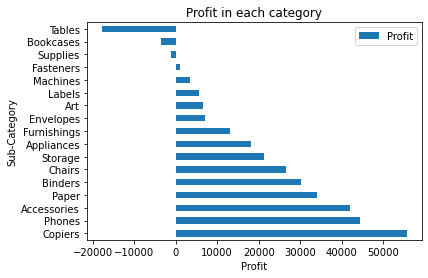

In [26]:
#Profit on each sub-category

plt.figure()
profit = dataset.groupby("Sub-Category").Profit.sum().nlargest(25)
profit.plot(kind="barh",label="Profit")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.title("Profit in each category")
plt.legend()
plt.show()

Observation:
*  Measures needs to be taken to improve sales and profit on Fasteners, Supplies and Bookcases. Also, there is a loss by sale of tables, so it has to be considered.

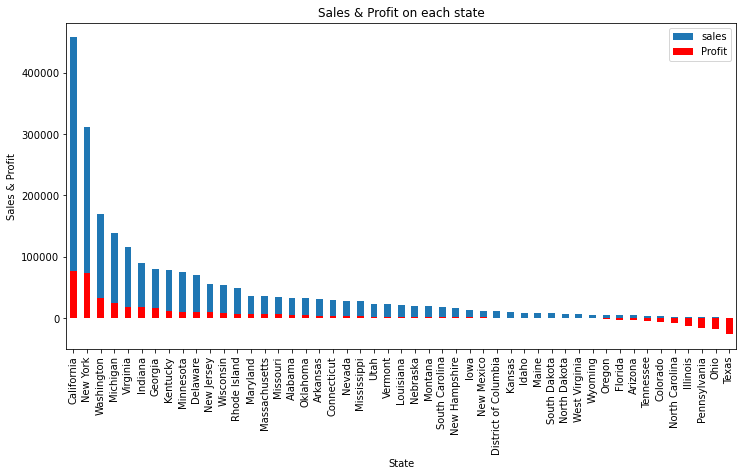

In [27]:
#Plotting sales & Profit in each state

plt.figure(figsize=(12,6))
sales = dataset.groupby("State").Sales.sum().nlargest(50)
profit = dataset.groupby("State").Profit.sum().nlargest(50)
sales.plot(kind="bar",label="sales")
profit.plot(kind="bar",color="red",label="Profit")
plt.xlabel("State")
plt.ylabel("Sales & Profit")
plt.title("Sales & Profit on each state")
plt.legend()
plt.show()

Observation:

Intense focussing on sales on these states are required as there are little or no sales at all,
* Texas, Ohio, Pennsylvania, IIIinois, North carolina, Corlorado, Tennessee, Arizona and Florida.

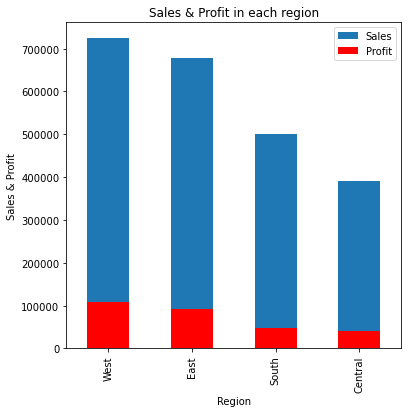

In [28]:
#plotting sales & Profit by region

plt.figure(figsize=(6,6))
Profit =  dataset.groupby("Region").Profit.sum().nlargest(n=4)
Sales =  dataset.groupby("Region").Sales.sum().nlargest(n=4)
Sales.plot(kind="bar",label="Sales")
Profit.plot(kind="bar",label="Profit",color="red")
plt.xlabel("Region")
plt.ylabel("Sales & Profit")
plt.title("Sales & Profit in each region")
plt.legend()
plt.show()

Observation:
    
* Sales & Profit are low in central and South regions

In [29]:
#Correlation between Profit and Discount

dataset['Profit'].corr(dataset['Discount'])

-0.21966206449082382

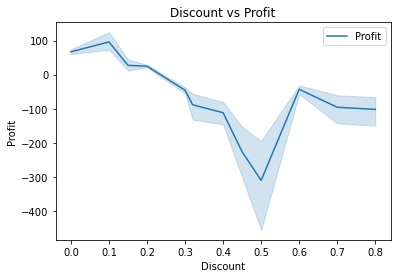

In [30]:
#Plotting Discount vs Profit

sns.lineplot(y="Profit",x="Discount",data=dataset,label="Profit")
plt.title("Discount vs Profit")
plt.legend()
plt.show()

Observation:
* Negative Correlation between Discount and Profit, so there is no use in increasing discounts more than 30-50% to get more profit.

### Multi-Variate Analysis

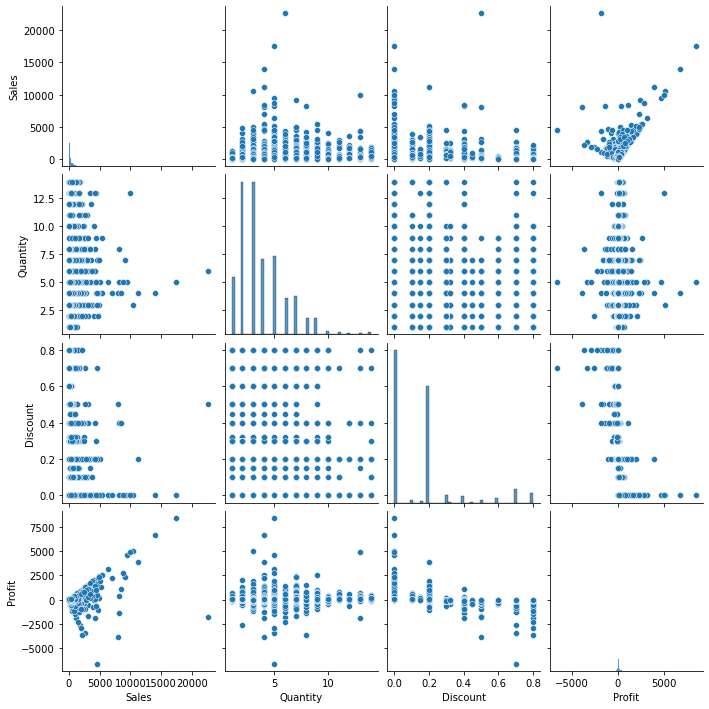

In [31]:
sns.pairplot(dataset)

Observation:

1) As the discount increases profit decreases [Inverse relationship]

2) The Profit increases as the sales is increased [Direct relationship]

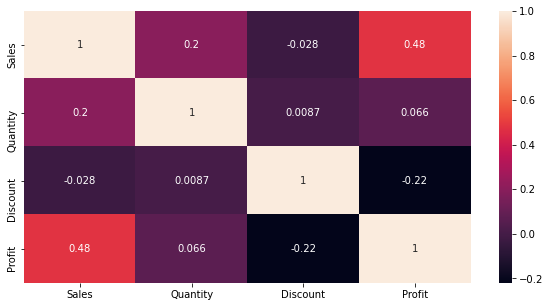

In [32]:
#generting heatmapfor correlation

plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Observation:

1) High Negative correlation between, Discount vs Profit

2) High Positive correlation between, sales vs profit

3) Moderate Correlation between, sales vs Quantity, sales vs Discount

# Conclusion:

1) We should limit sale of furniture and increase sales on technology and office suppliers as furniture has very less profit even when the sales in high.

2) Cities where Sales and Profit needs to be improved are, 
* Philadelphia, Houston, San Antonio, Lancaster, Chicago, Burlington, Dallas, phoenix and Aurora.

3) Intense focussing on sales on these states are required as there are little or no sales at all,
* Texas, Ohio, Pennsylvania, IIIinois, North carolina, Corlorado, Tennessee, Arizona and Florida.

4) Measures needs to be taken to improve sales and profit on Fasteners, Supplies and Bookcases. Also, there is a loss by sale of tables, so it has to be considered.

5) Negative Correlation between Discount and Profit, so there is no use in increasing discounts more than 30-50% to get more profit.

6) Positive correlation between sales and Quantity, so to improve sales we can supply more quantity.

7) High Positive correlation between sales and profit, so as sales increases, profit also increases.

8) Southern and central regions have low cashflow/customers than East and west regions. We should improve sales by giving discounts/incentives in these regions. Thereby profit can be increased on these states.

=====================================================Thank you=====================================================